In [34]:
# Make a dataframe that averages the data from the different iterations of version 2
# All version 2 data is labelled as "sparsity_v2_...."


# Read in all the csv files where the name starts with "sparsity_v2_"
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in all the csv files where the name starts with "sparsity_v2_"
path = os.getcwd()
files = glob.glob(os.path.join(path, "sparsity_v2_*.csv"))
# Average the data from the different iterations in files into one dataframe
df = pd.concat((pd.read_csv(file) for file in files), axis = 0, ignore_index= True)

# Rename the column form "Unnamed: 0" to "Iteration"
df.rename(columns = {"Unnamed: 0": "Iteration"}, inplace = True)

# Drop the columns B and K 
df.drop(["B", "K"], axis = 1, inplace = True)

,Iteration,A
0,0,0.295116
1,1,0.296969
2,2,0.199874
3,3,0.164191
4,4,0.147599
...,...,...
835,37,0.132062
836,38,0.132263
837,39,0.131833
838,40,0.131851


In [49]:
# Read in all the csv files where the name starts with "sparsity_v3_"
path = os.getcwd()
files = glob.glob(os.path.join(path, "sparsity_v3_*.csv"))

# Average the data from the different iterations in files into one dataframe
df2 = pd.concat((pd.read_csv(file) for file in files), axis = 0, ignore_index= True)

# Rename the column form "Unnamed: 0" to "Iteration"
df2.rename(columns = {"Unnamed: 0": "Iteration"}, inplace = True)

# Drop the columns B and K
df2.drop(["B", "K"], axis = 1, inplace = True)

# Read in all the csv files where the name starts with "sparsity_v4_"
path = os.getcwd()
files = glob.glob(os.path.join(path, "sparsity_v4_*.csv"))

# Average the data from the different iterations in files into one dataframe
df3 = pd.concat((pd.read_csv(file) for file in files), axis = 0, ignore_index= True)

# Rename the column form "Unnamed: 0" to "Iteration"
df3.rename(columns = {"Unnamed: 0": "Iteration"}, inplace = True)

# Drop the columns B and K
df3.drop(["B", "K"], axis = 1, inplace = True)

Text(0, 0.5, 'Sparsity of A')

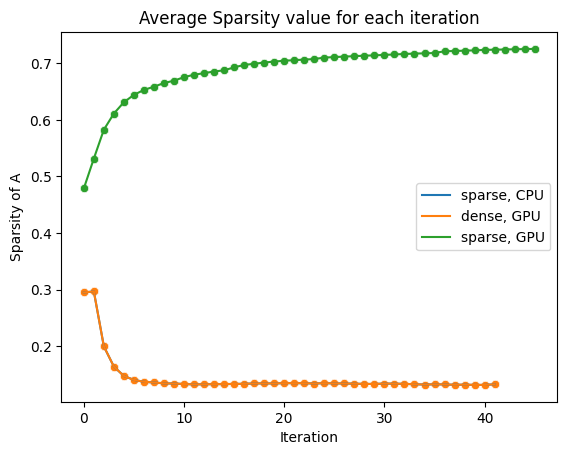

In [57]:
# Create a scatterplot of the data in df, grouped by iteration, for the column A 

# Create a figure
plt.figure()
# Create a scatter plot that plots the mean value in A for each iteration and depicts the error bars 
# as the standard deviation of the values in A for each iteration
sns.scatterplot(x = "Iteration", y = "A", data = df)
sns.lineplot(x = "Iteration", y = "A", data = df.groupby("Iteration").mean(), errorbar= "sd", label = "sparse, CPU")

sns.scatterplot(x = "Iteration", y = "A", data = df2)
sns.lineplot(x = "Iteration", y = "A", data = df2.groupby("Iteration").mean(), errorbar= "sd", label = "dense, GPU")

sns.scatterplot(x = "Iteration", y = "A", data = df3)
sns.lineplot(x = "Iteration", y = "A", data = df3.groupby("Iteration").mean(), errorbar= "sd", label = "sparse, GPU")

# Set the title of the plot
plt.title("Average Sparsity value for each iteration")

# Set the x-axis label
plt.xlabel("Iteration")

# Set the y-axis label
plt.ylabel("Sparsity of A")